## Phishing Email Classification

In [2]:
#import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
#import data and print to check form
df = pd.read_csv('phishing_email_scaled.csv')
print(df.shape)
df.sample(5)

(11000, 3)


,Unnamed: 0,text_combined,label
9698,9698,free euro january lst 2002 european countries ...,1
176,176,enron hpl actuals october 10 2000 teco tap 40 ...,0
3095,3095,cleburne plant maintenance update fyi checked ...,0
7663,7663,site john griebling organization research grou...,0
938,938,f hpl nom eff may 1 2001 nomination may 1 avai...,0


#### Code is all processed and formatted, now we pass through models for best classification model

(**Disclaimer:** *Switching data types for each 12000 rows of data takes a while, making this cell below run slower than usual (1-2 min). The memory allocated for the array would be exceeded if we used the full dataset given. We still get good accuracies with all the models, therefore making our scaling justified*.)

In [4]:
X = df['text_combined']
y = df['label']

print(type(X))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

<class 'pandas.core.series.Series'>


In [5]:
#create pipelines
pipeMNB = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

pipeCNB = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', ComplementNB())
])

pipeSVC = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LinearSVC())
])

pipeDTC = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', DecisionTreeClassifier())
])

pipeRFC = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', RandomForestClassifier())
])

pipeMLP = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MLPClassifier())
])

#### Time to fit and train models and print accuracy scores

In [6]:
#MNB PipeLine
pipeMNB.fit(X_train, y_train)
#preds
MNBpredict = pipeMNB.predict(X_test)

#score
MNBscore = accuracy_score(y_test, MNBpredict)
print(f"MNB Accuracy: {MNBscore}")

MNB Accuracy: 0.9054545454545454


In [7]:
#CNB Pipeline
pipeCNB.fit(X_train, y_train)
#preds
CNBpredict = pipeCNB.predict(X_test)

CNBscore = accuracy_score(y_test, CNBpredict)
print(f"CNB Accuracy: {CNBscore}")

CNB Accuracy: 0.9540909090909091


In [8]:
#LinearSVC Pipeline
pipeSVC.fit(X_train, y_train)
#preds
SVCpredict = pipeSVC.predict(X_test)

SVCscore = accuracy_score(y_test, SVCpredict)
print(f"SVC Accuracy: {SVCscore}")

SVC Accuracy: 0.9918181818181818


In [9]:
#Decision Tree Pipeline
pipeDTC.fit(X_train, y_train)
#preds
DTCpredict = pipeDTC.predict(X_test)

DTCscore = accuracy_score(y_test, DTCpredict)
print(f"Decision Tree Classifier Accuracy: {DTCscore}")

Decision Tree Classifier Accuracy: 0.9504545454545454


In [10]:
#Random Forest Pipeline
pipeRFC.fit(X_train, y_train)
#preds
RFCpredict = pipeRFC.predict(X_test)

RFCscore = accuracy_score(y_test, RFCpredict)
print(f"Random Forest Accuracy: {RFCscore}")


Random Forest Accuracy: 0.9818181818181818


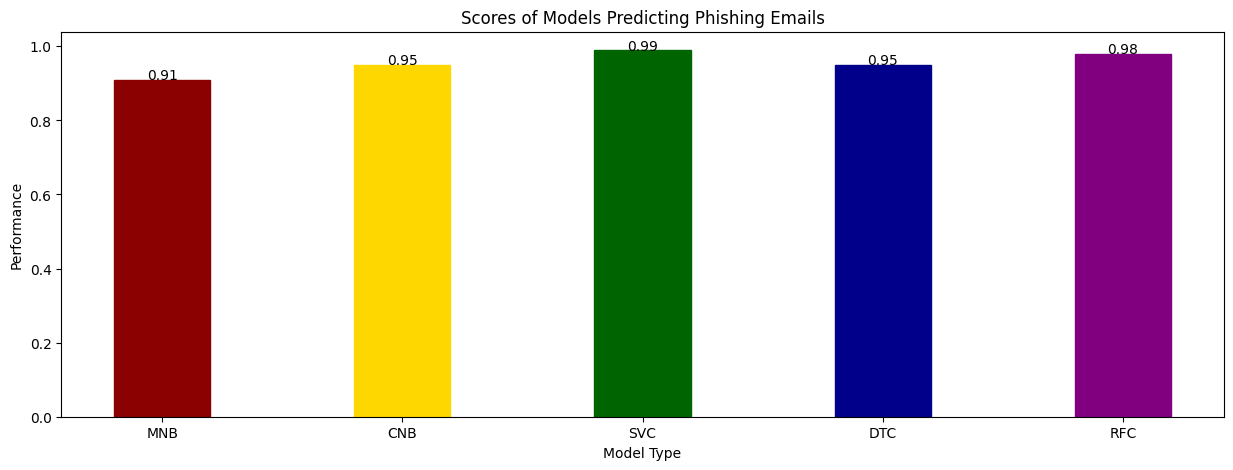

In [22]:
#Graph Performances based on training and testing
#Graphing performances of models
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha='center')

fig = plt.figure(figsize = (15, 5))
# creating the bar plot
xFeatures = ['MNB', 'CNB', 'SVC', 'DTC', 'RFC']
yFeatures = [round(MNBscore, 2), round(CNBscore, 2), round(SVCscore, 2), round(DTCscore, 2), round(RFCscore, 2)]
bars = plt.bar(xFeatures, yFeatures, width = 0.4)
addlabels(xFeatures, yFeatures)
plt.xlabel("Model Type")
plt.ylabel("Performance")
plt.title("Scores of Models Predicting Phishing Emails")
bars[0].set_color('darkred')
bars[1].set_color('gold')
bars[2].set_color('darkgreen')
bars[3].set_color('darkblue')
bars[4].set_color('purple')
plt.show()